Accuracy: 0.9038133804468488
Precision: 0.34615384615384615
Recall: 0.11266094420600858
F1 Score: 0.16999460334592553
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.35      0.11      0.17      5592

    accuracy                           0.90     63959
   macro avg       0.63      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959



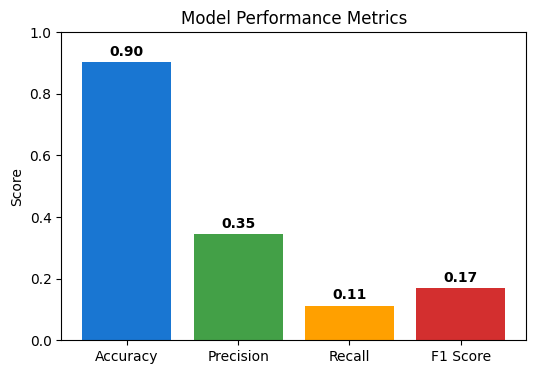

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, precision_score
import joblib

# Load dataset
# Use the correct relative path to the Data folder
data = pd.read_csv("../Data/heart_2020_cleaned.csv")

# Encode all object (string) columns automatically
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Drop rows with missing values if any
data = data.dropna()

# Identify categorical and numeric columns
def get_column_types(df):
    cat_cols = []
    num_cols = []
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)
    return cat_cols, num_cols

cat_cols, num_cols = get_column_types(data.drop('HeartDisease', axis=1))

# Prepare options for categorical columns
def get_options(df, col):
    vals = df[col].unique()
    return sorted([str(v) for v in vals])

labels = list(data.drop('HeartDisease', axis=1).columns)
input_widgets = []

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data.drop('HeartDisease', axis=1), data['HeartDisease'], test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

# Plot metrics
import matplotlib.pyplot as plt
metrics = [accuracy, precision, recall, f1]
labels_ = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(6,4))
plt.bar(labels_, metrics, color=['#1976D2', '#43A047', '#FFA000', '#D32F2F'])
plt.ylim(0,1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


# Data Loading and Preprocessing
This cell loads the dataset, encodes categorical variables, and prepares the data for modeling.

In [24]:
# Show basic info and missing values
data = pd.read_csv("../Data/heart_2020_cleaned.csv")
print("Data shape:", data.shape)
data.info()
print("\nMissing values per column:\n", data.isnull().sum())

# Encode categorical columns
def encode_categoricals(df):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])
    return df

data = encode_categoricals(data)

data.head()

Data shape: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


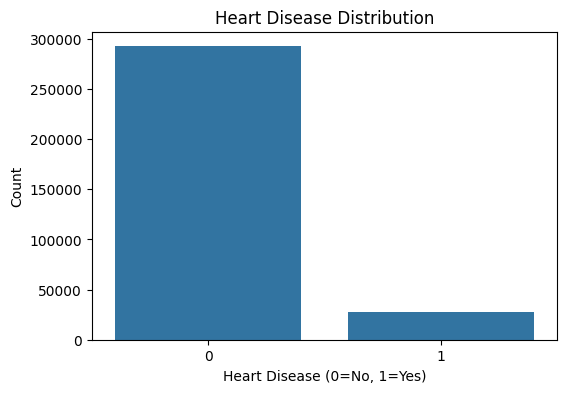

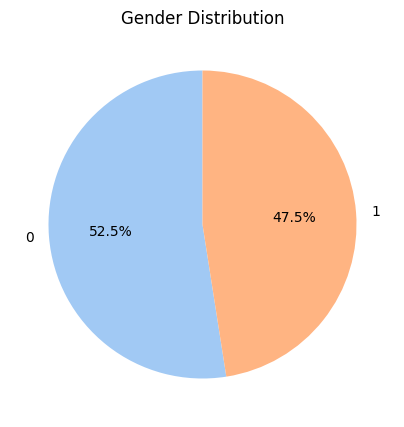

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot: Heart Disease distribution
plt.figure(figsize=(6,4))
sns.countplot(x='HeartDisease', data=data)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

# Pie chart: Gender distribution
plt.figure(figsize=(5,5))
gender_counts = data['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')
plt.show()

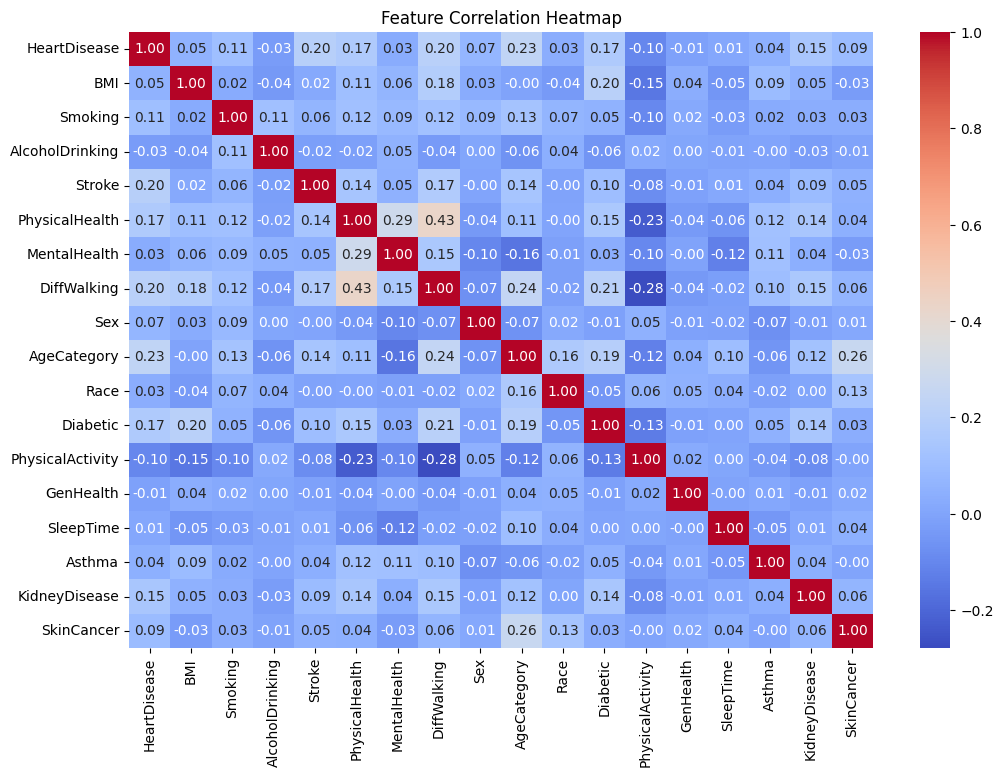

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Data Overview and Missing Values
This cell displays the shape, info, and missing values in the dataset.

In [27]:
plt.figure(figsize=(8,5))
if 'Age' in data.columns and 'HeartDisease' in data.columns:
    sns.histplot(data=data, x='Age', hue='HeartDisease', multiple='stack', bins=30)
    plt.title('Age Distribution by Heart Disease')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
else:
    print('Age or HeartDisease column not found in data.')

Age or HeartDisease column not found in data.


<Figure size 800x500 with 0 Axes>

# Age Distribution by Heart Disease
This plot shows how age is distributed among people with and without heart disease.

# Target and Gender Distribution
This cell visualizes the distribution of the target variable (Heart Disease) and the gender distribution in the dataset.

# Correlation Heatmap
This plot shows the correlation between all numeric features in the dataset.

# Model Training and Evaluation
This cell trains a Random Forest model, evaluates it, and visualizes accuracy, precision, recall, and F1 score.

In [28]:
plt.figure(figsize=(8,5))
if 'Age' in data.columns and 'HeartDisease' in data.columns:
    sns.histplot(data=data, x='Age', hue='HeartDisease', multiple='stack', bins=30)
    plt.title('Age Distribution by Heart Disease')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
else:
    print('Age or HeartDisease column not found in data.')

Age or HeartDisease column not found in data.


<Figure size 800x500 with 0 Axes>

# Age Distribution by Heart Disease
This plot shows how age is distributed among people with and without heart disease.

# Summary and Next Steps
The above visualizations provide insights into the dataset. Next, we present the interactive user interface for heart disease prediction.

# Data Visualization
This section provides visual insights into the dataset using bar plots, pie charts, and other useful charts.

# Data Preprocessing
This section loads the dataset, encodes categorical variables, and prepares the data for modeling and visualization.

In [29]:
# Heart Disease Predictor User Interface
# This section demonstrates a dynamic Tkinter GUI for heart disease prediction. The interface automatically generates dropdowns for categorical features (with Yes/No for binary) and entry fields for numeric features, based on the dataset.

import tkinter as tk
from tkinter import messagebox
import pandas as pd
import joblib

# Load the dataset
try:
    data = pd.read_csv("../Data/heart_2020_cleaned.csv")
except Exception:
    data = None

# Load the model (assume model is trained and saved as 'model.pkl')
model = None
try:
    model = joblib.load("model.pkl")
except Exception:
    pass  # For UI demo purposes if model is not present

# Identify categorical and numeric columns
def get_column_types(df):
    cat_cols = []
    num_cols = []
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)
    return cat_cols, num_cols

cat_cols, num_cols = get_column_types(data.drop('HeartDisease', axis=1))

# Prepare options for categorical columns, with Yes/No mapping for binary
def get_options(df, col):
    vals = sorted(df[col].unique())
    if len(vals) == 2:
        # Try to map to Yes/No if possible
        if set(vals) == {0, 1}:
            return ["No", "Yes"], {"No": 0, "Yes": 1}
        elif set(str(v).lower() for v in vals) == {"no", "yes"}:
            return ["No", "Yes"], {"No": "No", "Yes": "Yes"}
        else:
            return [str(v) for v in vals], {str(v): v for v in vals}
    else:
        return [str(v) for v in vals], {str(v): v for v in vals}

labels = list(data.drop('HeartDisease', axis=1).columns)
input_widgets = []
option_maps = {}

# Build the Tkinter GUI
def build_gui():
    root = tk.Tk()
    root.title("Heart Disease Predictor")
    root.geometry(f"520x{44*len(labels)+140}")
    root.configure(bg="#f5f5f5")

    header = tk.Label(root, text="Heart Disease Predictor", font=("Arial", 20, "bold"), bg="#f5f5f5", fg="#1976D2")
    header.pack(pady=(20, 10))

    desc = tk.Label(root, text="Enter your health details below and click Predict.", font=("Arial", 12), bg="#f5f5f5")
    desc.pack(pady=(0, 10))

    frame = tk.Frame(root, padx=20, pady=10, bg="#f5f5f5")
    frame.pack()

    for i, label in enumerate(labels):
        tk.Label(frame, text=label, anchor="w", width=22, font=("Arial", 10), bg="#f5f5f5").grid(row=i, column=0, sticky="w", pady=4)
        if label in cat_cols:
            opts, opt_map = get_options(data, label)
            var = tk.StringVar(value="Select")
            opt = tk.OptionMenu(frame, var, *opts)
            opt.config(width=20, font=("Arial", 10), bg="#f5f5f5", relief="groove", highlightthickness=1)
            opt.var = var
            opt.grid(row=i, column=1, pady=4)
            input_widgets.append(opt)
            option_maps[label] = opt_map
        else:
            entry = tk.Entry(frame, width=22, font=("Arial", 10))
            entry.grid(row=i, column=1, pady=4)
            input_widgets.append(entry)

    def animate_button(btn):
        def grow():
            btn.config(font=("Arial", 14, "bold"))
            btn.after(120, shrink)
        def shrink():
            btn.config(font=("Arial", 12, "bold"))
        grow()

    def predict():
        animate_button(predict_btn)
        try:
            vals = []
            for i, widget in enumerate(input_widgets):
                label = labels[i]
                if isinstance(widget, tk.Entry):
                    val = widget.get()
                    if val == "":
                        raise ValueError(f"Missing value for {label}")
                    try:
                        val = float(val)
                    except ValueError:
                        raise ValueError(f"Invalid number for {label}")
                else:  # OptionMenu
                    val = widget.var.get()
                    if val == "" or val == "Select":
                        raise ValueError(f"Missing value for {label}")
                    # Map display value to code
                    val = option_maps[label][val]
                vals.append(val)
            if model:
                pred = model.predict([vals])[0]
                result = "⚠️ High Risk of Heart Disease" if pred == 1 else "✅ Low Risk"
                messagebox.showinfo("Prediction", result)
            else:
                messagebox.showinfo("Prediction", f"Inputs: {vals}\n(Model not loaded)")
        except ValueError as ve:
            messagebox.showerror("Input Error", str(ve))
        except Exception:
            messagebox.showerror("Error", "Please enter valid values for all fields.")

    predict_btn = tk.Button(
        root, text="Predict", command=predict,
        bg="#43A047", fg="white", font=("Arial", 12, "bold"),
        activebackground="#388E3C", activeforeground="white",
        width=20, height=2, bd=0, relief="ridge", cursor="hand2"
    )
    predict_btn.pack(pady=20)

    footer = tk.Label(root, text="Powered by Machine Learning", font=("Arial", 9), bg="#f5f5f5", fg="#888")
    footer.pack(side="bottom", pady=8)

    root.mainloop()

# Run the GUI
build_gui()